First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0        1      168      0      1.0      2   2     3       0
1   53    1   0       140   203    1        0      155      1      3.1      0   0     3       0
2   70    1   0       145   174    0        1      125      1      2.6      0   0     3       0
3   61    1   0       148   203    0        1      161      0      0.0      2   1     3       0
4   62    0   0       138   294    1        1      106      0      1.9      1   3     2       0


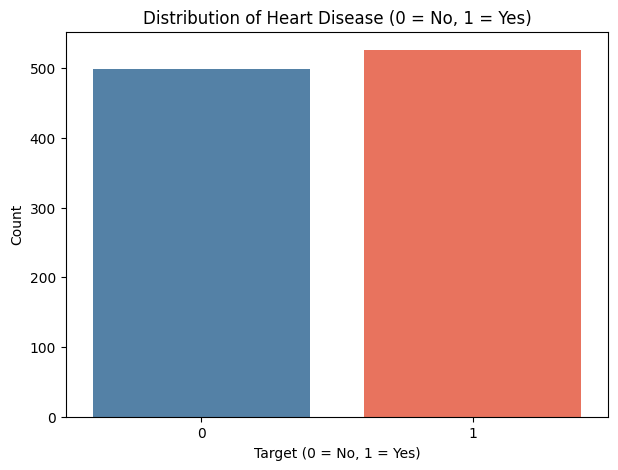

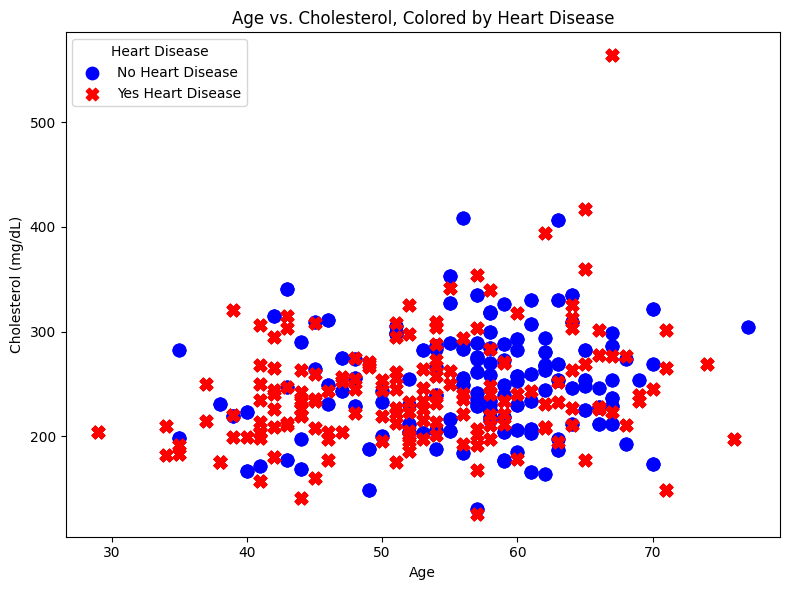

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Download and load the dataset
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
df = pd.read_csv(f"{path}/heart.csv")

# Print the first 5 rows of the dataset neatly
print("First 5 rows of the dataset:")
print(df.head().to_string())

# Visualization 1: Distribution of the target variable
plt.figure(figsize=(7, 5))
sns.countplot(x='target', data=df, hue='target', palette={0: '#4682B4', 1: '#FF6347'}, legend=False)
plt.title('Distribution of Heart Disease (0 = No, 1 = Yes)')
plt.xlabel('Target (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Visualization 2: Scatter plot of Age vs. Cholesterol, Colored by Heart Disease
plt.figure(figsize=(8, 6))
# Filter data for each class and plot separately for guaranteed distinction
df_no = df[df['target'] == 0]
df_yes = df[df['target'] == 1]

plt.scatter(x=df_no['age'], y=df_no['chol'], color='blue', marker='o', s=80, label='No Heart Disease')
plt.scatter(x=df_yes['age'], y=df_yes['chol'], color='red', marker='X', s=80, label='Yes Heart Disease')

plt.title('Age vs. Cholesterol, Colored by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dL)')
plt.legend(title='Heart Disease')
plt.tight_layout()
plt.show()

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data and standardize features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the MLP model
model = keras.Sequential([
    layers.Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),  # Adding a dropout layer to prevent overfitting
    layers.Dense(units=32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train the model and store the history
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions for a detailed report
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype("int32")

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6044 - loss: 0.6631 - val_accuracy: 0.6951 - val_loss: 0.5854
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7686 - loss: 0.5264 - val_accuracy: 0.7317 - val_loss: 0.5231
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8278 - loss: 0.4373 - val_accuracy: 0.7683 - val_loss: 0.4980
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8543 - loss: 0.3814 - val_accuracy: 0.7683 - val_loss: 0.4880
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8735 - loss: 0.3313 - val_accuracy: 0.7683 - val_loss: 0.4855
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8564 - loss: 0.3336 - val_accuracy: 0.7927 - val_loss: 0.4770
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8749 - loss: 0.3235 - val_accuracy: 0.8049 - val_loss: 0.4761
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8763 - loss: 0.3146 - val_accuracy: 0.7927 

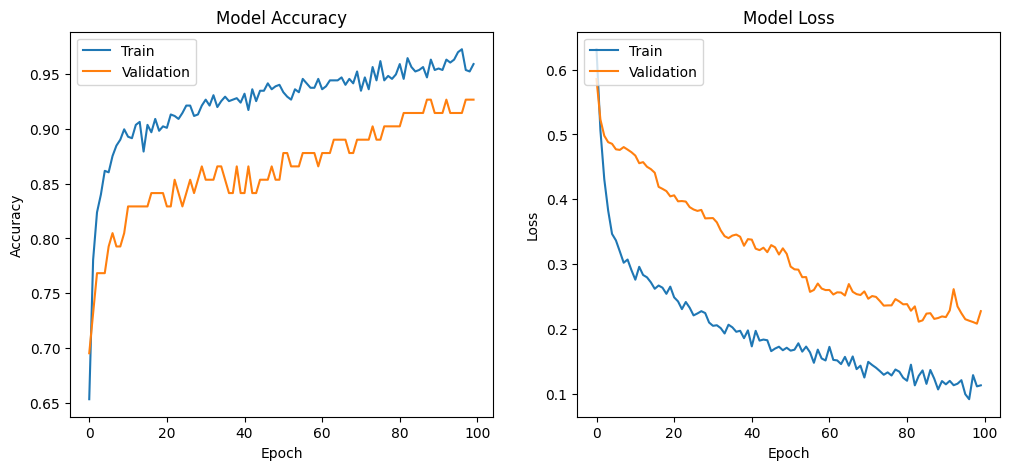


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       102
           1       0.88      0.94      0.91       103

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



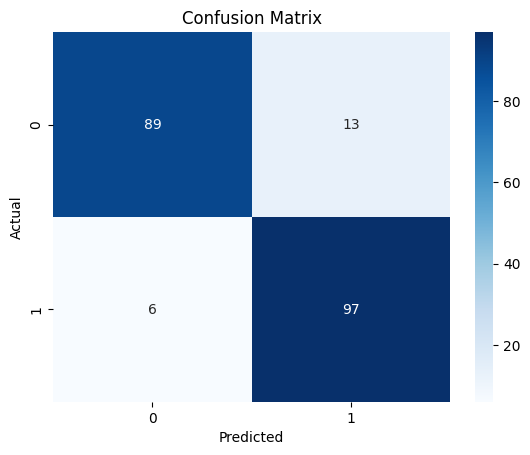

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()